In [1]:
import pandas as pd; import numpy as np
pd.set_option('display.max_columns', 50)
# traffic station characteristics
traffic_station_df = pd.read_csv('dot_traffic_stations_2015.txt',
                                 header=0, sep=',', quotechar='"')

# traffic volume metrics associated to each traffic station
traffic_df = pd.read_csv('dot_traffic_2015.txt',
                         header=0, sep=',', quotechar='"')

# rename terribly long feature names
traffic_station_df.rename(columns = {"number_of_lanes_in_direction_indicated": "lane_count"}, inplace = True)

In [2]:
# specify the features we'll want going forward
station_vars = ["direction_of_travel", "fips_county_code", "fips_state_code",
                "lane_of_travel", "lane_count", "latitude", "longitude", 
                "station_id", "station_location", "type_of_sensor", "year_of_data",
                "year_station_established"]

traffic_vars = ["date", "day_of_data", "day_of_week", "direction_of_travel",
                "fips_state_code", "lane_of_travel", "month_of_data", "record_type",
                "restrictions", "station_id", "traffic_volume_counted_after_0800_to_0900"]
# filter data to just columns of interest and MN based
traffic_station_df = traffic_station_df[station_vars][traffic_station_df.fips_state_code==27]
traffic_df = traffic_df[traffic_vars][traffic_df.fips_state_code==27]

# I don't want to carry that super long column name through the project, shorten it
traffic_df.rename(columns = {"traffic_volume_counted_after_0800_to_0900": "traffic_volume"}, inplace = True)

traffic_df = traffic_df[traffic_df.station_id=='000326']

traffic_df.drop(['station_id', 'fips_state_code', 'lane_of_travel',
                 'restrictions', 'record_type'], axis=1, inplace=True)

In [3]:
traffic_df

,date,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume
8649,2015-05-16,16,7,3,5,2626
21530,2015-12-28,28,2,3,12,3749
29488,2015-07-18,18,7,7,7,868
44075,2015-05-17,17,1,7,5,1225
48849,2015-06-23,23,3,7,6,5688
52285,2015-09-09,9,4,3,9,2366
54597,2015-11-17,17,3,3,11,4561
57686,2015-09-01,1,3,3,9,1982
73286,2015-09-30,30,4,3,9,2366
107615,2015-12-26,26,7,3,12,1047


In [4]:
traffic_df.dtypes

date                   object
day_of_data             int64
day_of_week             int64
direction_of_travel     int64
month_of_data           int64
traffic_volume          int64
dtype: object

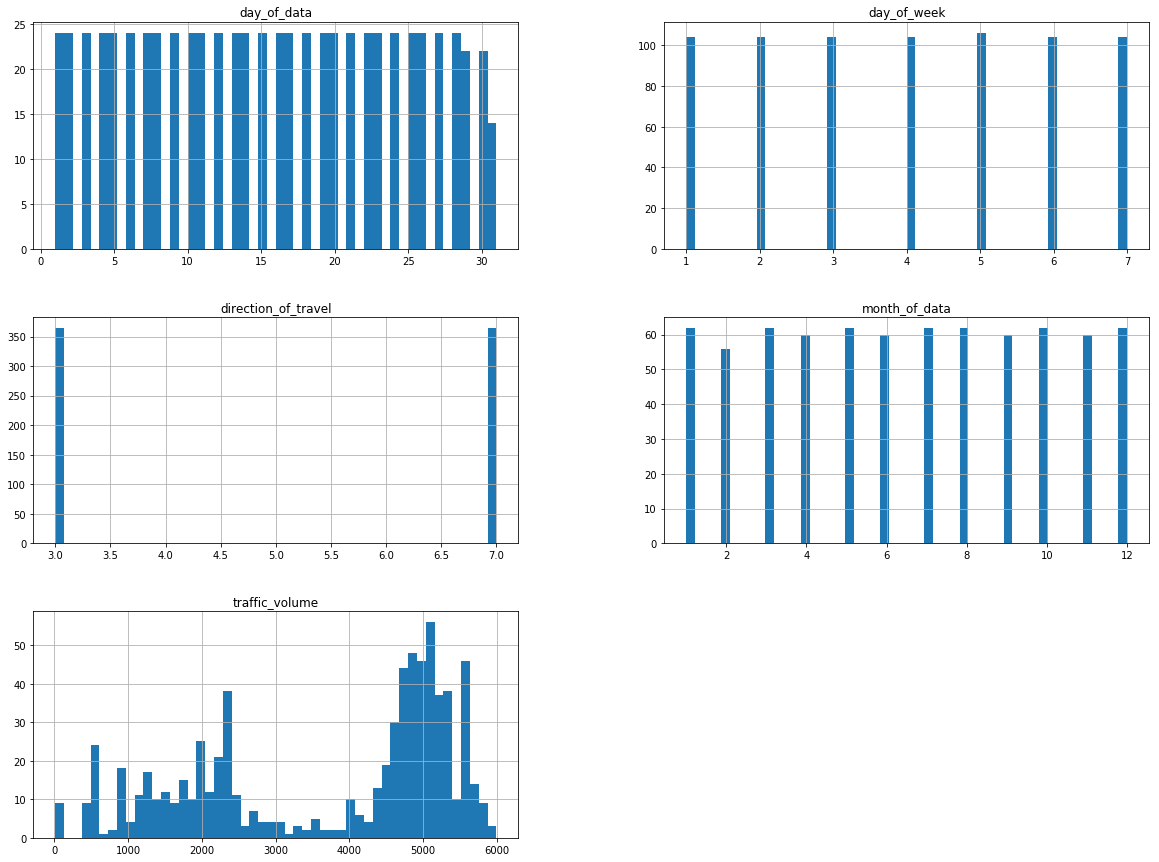

In [9]:
# create histograms of each variable
%matplotlib inline
import matplotlib.pyplot as plt
traffic_df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
series = pd.read_csv('dot_traffic_2015.txt', header=0,index_col=0, parse_dates=True, squeeze=True, sep=',', quotechar='"')

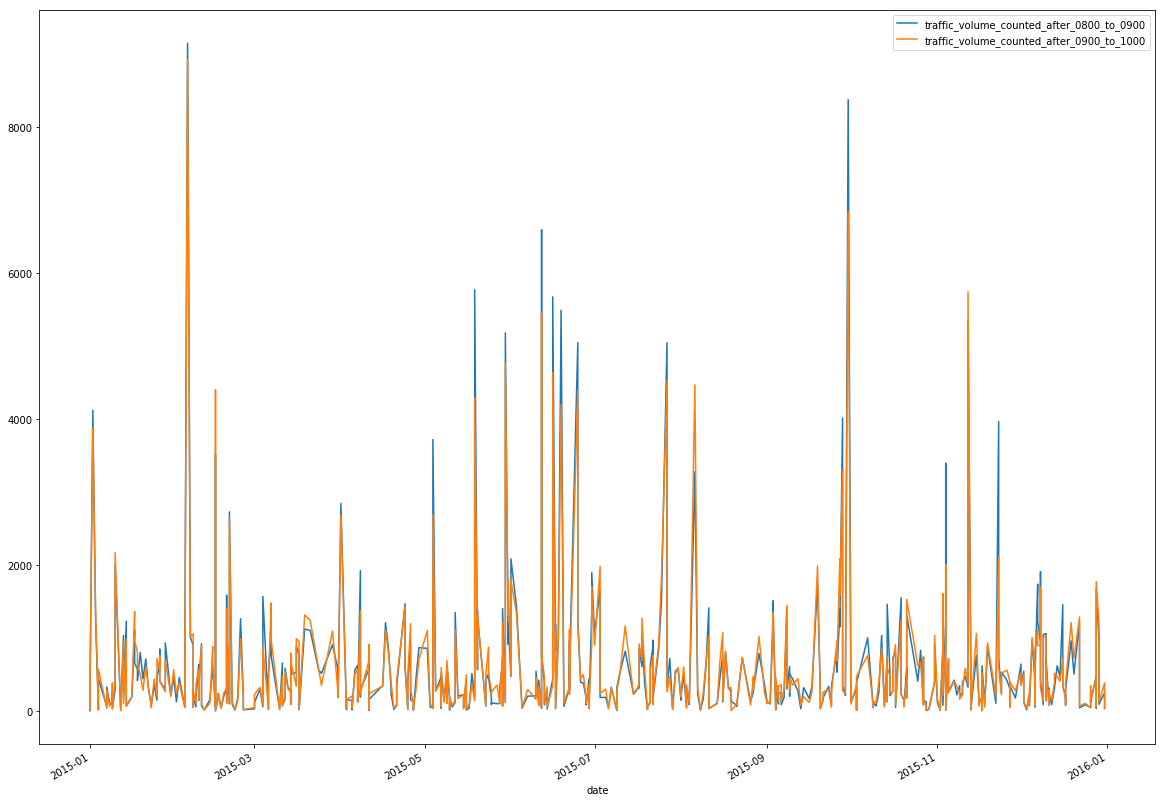

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
series_df = series.head(500)
series_df.plot(y=['traffic_volume_counted_after_0800_to_0900','traffic_volume_counted_after_0900_to_1000'],figsize=(20,15))
plt.show()

In [13]:
# read in US bank holiday data. Source: https://gist.github.com/shivaas/4758439
holidays = pd.read_csv('holidays.txt', names=['id','date', 'holiday_name'], sep=',', quotechar='"')

In [14]:
holidays

,id,date,holiday_name
0,1,2012-01-02,New Year Day
1,2,2012-01-16,Martin Luther King Jr. Day
2,3,2012-02-20,Presidents Day (Washingtons Birthday)
3,4,2012-05-28,Memorial Day
4,5,2012-07-04,Independence Day
5,6,2012-09-03,Labor Day
6,7,2012-10-08,Columbus Day
7,8,2012-11-12,Veterans Day
8,9,2012-11-22,Thanksgiving Day
9,10,2012-12-25,Christmas Day


In [15]:
# join traffic data with holiday data on the date
traffic_df = pd.merge(traffic_df, holidays, how='left', on='date')

In [16]:
traffic_df[['holiday_name']] = traffic_df[['holiday_name']].fillna(value=0)
traffic_df['holiday_flag'] = [0 if x == 0 else 1 for x in traffic_df['holiday_name']]
traffic_df.drop(['id', 'holiday_name'], axis=1, inplace=True)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(traffic_df, traffic_df["holiday_flag"]):
    strat_train_set = traffic_df.loc[train_index]
    strat_test_set = traffic_df.loc[test_index]

In [18]:
strat_test_set["holiday_flag"].value_counts() / len(strat_test_set)
traffic_df["holiday_flag"].value_counts() / len(traffic_df)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


0    0.972603
1    0.027397
Name: holiday_flag, dtype: float64

In [19]:
# slimming down traffic_df to only our training data
traffic_df = strat_train_set.copy()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


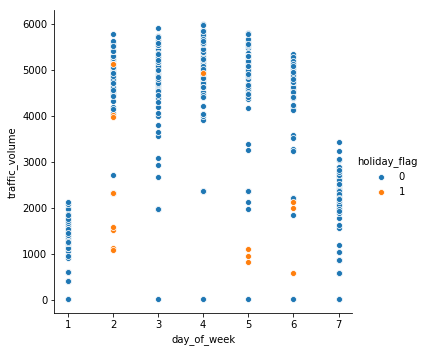

In [21]:
# seaborn for vis
# after running this a few times, became most interested in the impact of holidays on traffic volume
import seaborn as sns

# view traffic by DOW with impact of holiday flag
sns.pairplot(x_vars=["day_of_week"], y_vars=["traffic_volume"],
             data=traffic_df, hue="holiday_flag", size=5)

In [22]:
# remove unpredictable outliers
traffic_df = traffic_df[traffic_df.traffic_volume>50]

In [23]:
print("Median traffic volume is ", traffic_df["traffic_volume"].median())

Median traffic volume is  4626.0


In [25]:
# let's look at linear correlations
corr_matrix = traffic_df.corr()
corr_matrix["traffic_volume"].sort_values(ascending=False)

traffic_volume         1.000000
direction_of_travel    0.165142
day_of_week            0.083121
day_of_data           -0.058054
holiday_flag          -0.145675
month_of_data         -0.158166
Name: traffic_volume, dtype: float64

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


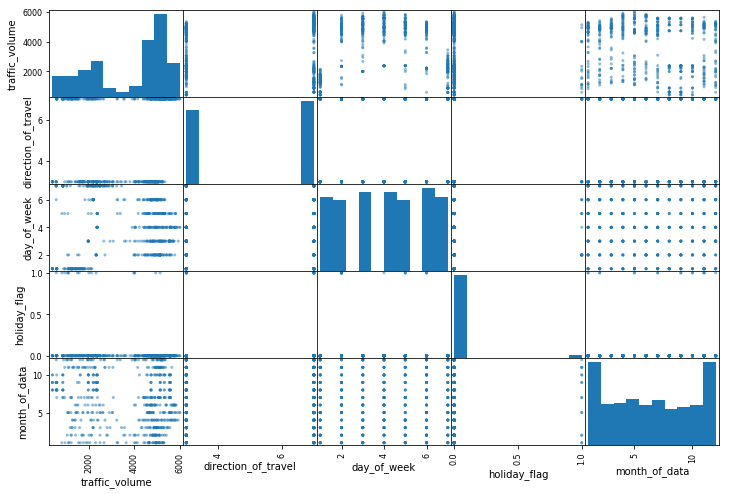

In [27]:
from pandas.tools.plotting import scatter_matrix

attributes = ["traffic_volume", "direction_of_travel", "day_of_week",
              "holiday_flag", "month_of_data"]

_ = scatter_matrix(traffic_df[attributes], figsize=(12, 8))

In [30]:
# look at the correlation matrix again
corr_matrix = traffic_df.corr()
corr_matrix["traffic_volume"].sort_values(ascending=False)

traffic_volume         1.000000
direction_of_travel    0.165142
day_of_week            0.083121
day_of_data           -0.058054
holiday_flag          -0.145675
month_of_data         -0.158166
Name: traffic_volume, dtype: float64

In [31]:
traffic_benchmark_data = strat_train_set.copy()

In [32]:
traffic_df = strat_train_set.drop("traffic_volume", axis=1)
traffic_labels = strat_train_set["traffic_volume"].copy()

In [33]:
traffic_df.isnull().sum()

date                   0
day_of_data            0
day_of_week            0
direction_of_travel    0
month_of_data          0
holiday_flag           0
dtype: int64

In [44]:
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# subset numerical columns only
traffic_num = traffic_df.drop(["date"], axis=1)

# fit the imputer to numerical data (aka for our case, find the median values in each column)
imputer.fit(traffic_num)

print("Median values:")
for i in range(len(imputer.statistics_)):
    print(traffic_num.columns[i], imputer.statistics_[i])

Median values:
day_of_data 16.0
day_of_week 4.0
direction_of_travel 7.0
month_of_data 6.0
holiday_flag 0.0


In [45]:
X = imputer.transform(traffic_num)
traffic_tr = pd.DataFrame(X, columns=traffic_num.columns)

In [46]:
traffic_tr.loc[(traffic_tr.month_of_data==8) & (traffic_tr.day_of_data==6)]

,day_of_data,day_of_week,direction_of_travel,month_of_data,holiday_flag
304,6.0,5.0,3.0,8.0,0.0
